In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools as at

# Section 1 - CSF Smooth Steer

## 1.1 Define Functions to steer

In [2]:
save_dir = '/eos/user/e/elsweene/SWAN_projects/Filtered_data_sets/'

In [3]:
## Load in CSF data

Zoom_in_CSF = pd.read_csv(save_dir +"Zoom_in_CSF_Data_filtered.csv")

In [4]:
## Assign arrays to columns to allow indexing

Time_CSF_array = np.array(Zoom_in_CSF['TimeStamp'])
offset_array_CSF = np.array(Zoom_in_CSF['f0'])

In [5]:
## Define funcction to fit line 

def fit_line(Array_of_interest1,Array_of_interest2,index,numberhrs):
    
    m,b = np.polyfit(Array_of_interest1[index:index+numberhrs],-1*Array_of_interest2[index:index +numberhrs], 1)
    
    return m,b

In [6]:
## Define function to perform smooth steer

def smooth_steer_CSF(range_loop,no_hours,day_conversion,original_array):
    
    offset_array_CSF1 = original_array
    

    for i in range_loop:


        m_d,b_f = fit_line(Time_CSF_array,-1*offset_array_CSF1,i,no_hours)     ## fit to section of data 


        def f_off(slope,index) :
            return slope*(Time_CSF_array[index]) + b_f                                    ## function to find f_off

        f_0 = f_off(m_d,(i+(no_hours-1)))


        m = - (f_0+(day_conversion)*m_d)/day_conversion                                                  ## find m 


        def shift(t):                                                        ## define lin function to be added to original data
            return m*t

        set_interest1 = Time_CSF_array[i+no_hours:]
        line3 = np.array(shift(set_interest1-set_interest1[0]))

        index = len(Time_CSF_array) - len(set_interest1)

        offset_array_CSF1[index:] += line3
        
    return(offset_array_CSF1)

In [40]:
## Define function to plot steered data against raw data

def plot_steer(step_hrs,shifted_array):
    
    plt.figure(figsize=(15,10))
    
    plot1 = plt.scatter(Zoom_in_CSF['TimeStamp'],-1*Zoom_in_CSF['f0'],label='Raw')
    plot2 = plt.scatter(Time_CSF_array,-1*shifted_array,label='Shifted after '+ str(step_hrs) +' hrs')
    
    plt.title('Plot of Fractional Frequency corrected by Smooth Step every ' +  str(step_hrs) + ' hrs -no offset',fontsize=25)
    plt.xlabel('MJD (days)',fontsize=20)
    plt.ylabel('Fractional Frequency',fontsize=20)

    plt.legend(loc=3,fontsize=20)
    
    return(plot1,plot2)

In [8]:
## Define function to calculate Allan Deviation and plot

def Allan_Dev(y,rate,t,hrs) : 
    
    (t, ad1, ade, adn) = at.oadev(y, rate, data_type="freq",taus=t)
    
    return plt.loglog(t,ad1,'o',label= str(hrs) +' hrs')

## 1.2 - Evaluate for various step sizes and plot

(<matplotlib.collections.PathCollection at 0x7fbc737791c0>,
 <matplotlib.collections.PathCollection at 0x7fbc737310a0>)

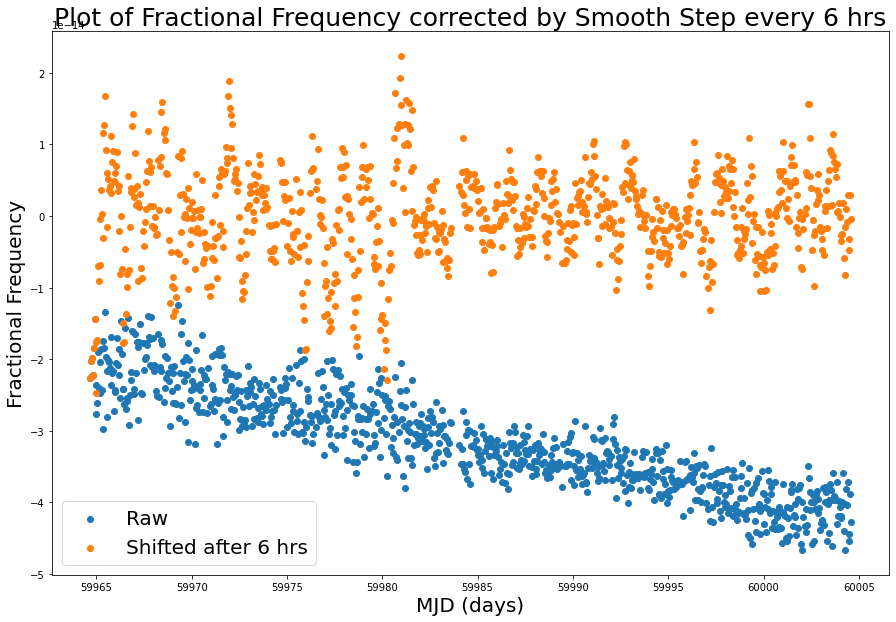

In [36]:
## Smooth steer every 6 hours

smooth_steer6 = smooth_steer_CSF(np.arange(0,894,6),6,.25, np.array(Zoom_in_CSF['f0']))
plot_steer(6,smooth_steer6)

(<matplotlib.collections.PathCollection at 0x7fbc73693910>,
 <matplotlib.collections.PathCollection at 0x7fbc736db520>)

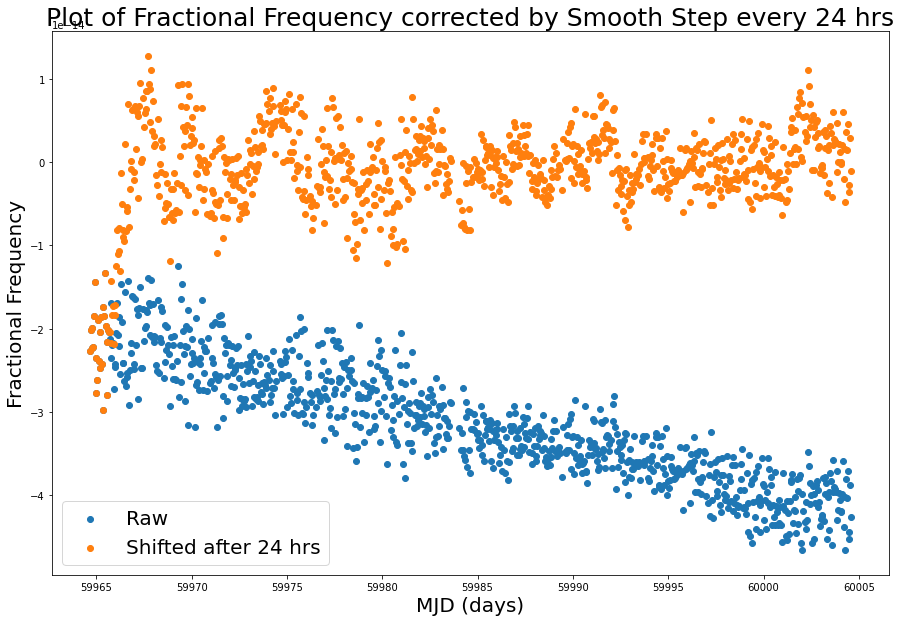

In [37]:
## Smooth steer every 24 hours

smooth_steer24 = smooth_steer_CSF(np.arange(0,870,24),24,1, np.array(Zoom_in_CSF['f0']))
plot_steer(24,smooth_steer24)

(<matplotlib.collections.PathCollection at 0x7fbc7367e400>,
 <matplotlib.collections.PathCollection at 0x7fbc7364f8b0>)

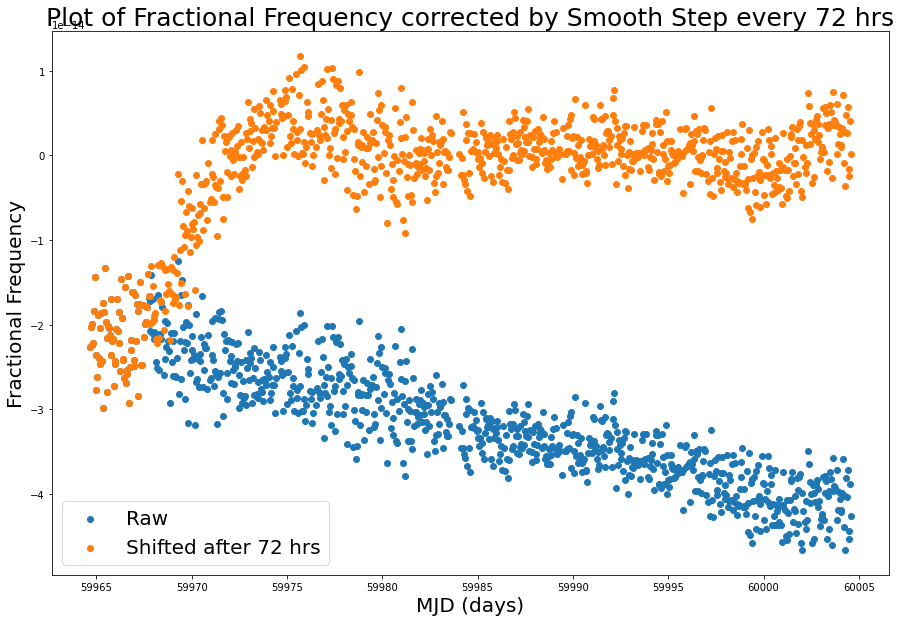

In [38]:
## Smooth steer every 72 hours

smooth_steer72 = smooth_steer_CSF(np.arange(0,850,72),72,3, np.array(Zoom_in_CSF['f0']))
plot_steer(72,smooth_steer72)

(<matplotlib.collections.PathCollection at 0x7fbc735e2e80>,
 <matplotlib.collections.PathCollection at 0x7fbc736369a0>)

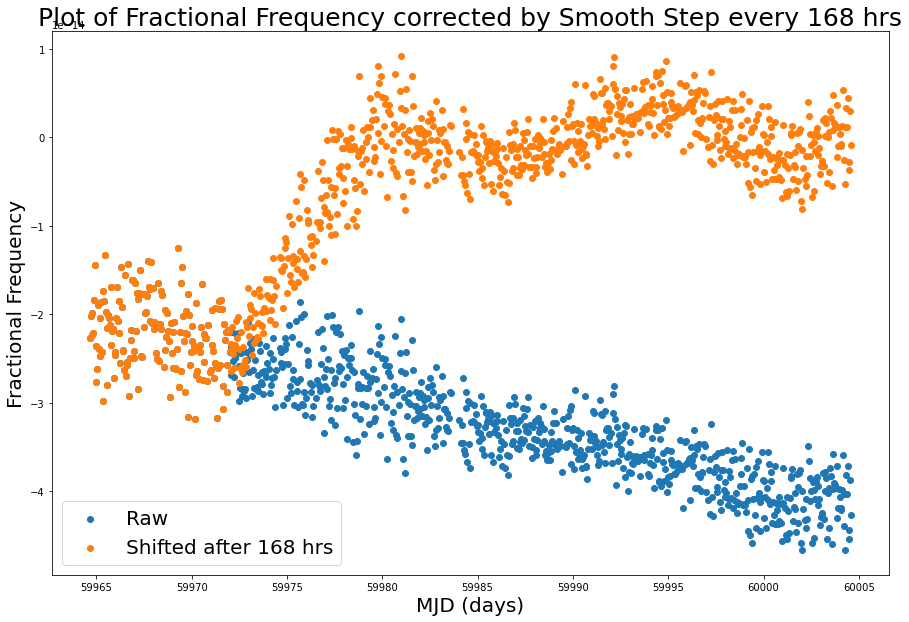

In [39]:
## Smooth steer every week

smooth_steerweek = smooth_steer_CSF(np.arange(0,750,168),168,7, np.array(Zoom_in_CSF['f0']))
plot_steer(168,smooth_steerweek)

## 1.3 Calculate and Plot Allan Deviation

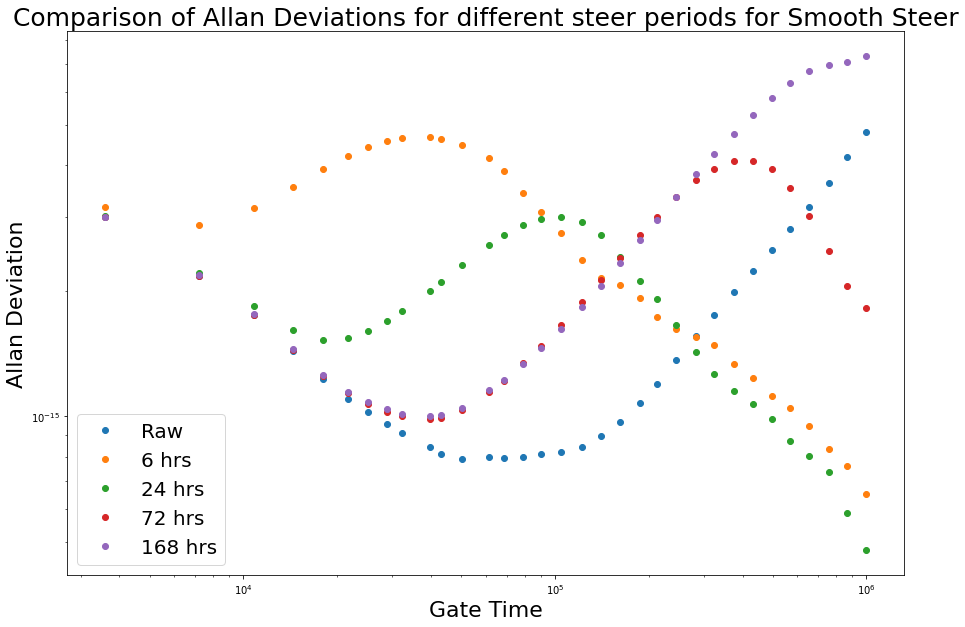

In [31]:
plt.figure(figsize=(15,10))

(t2, ad, ade, adn) = at.oadev(np.array(Zoom_in_CSF['f0']), rate=1/3600, data_type="freq",taus=np.logspace(0,6,100))
plt.loglog(t2, ad,'o',label='Raw')

AD6_smooth = Allan_Dev(smooth_steer6,1/3600,np.logspace(0,6,100),6)
AD24_smooth  = Allan_Dev(smooth_steer24,1/3600,np.logspace(0,6,100),24)
AD72_smooth  = Allan_Dev(smooth_steer72,1/3600,np.logspace(0,6,100),72)
AD168_smooth  = Allan_Dev(smooth_steerweek,1/3600,np.logspace(0,6,100),168)

plt.xlabel('Gate Time',fontsize=22)
plt.ylabel('Allan Deviation', fontsize=22)
plt.title('Comparison of Allan Deviations for different steer periods for Smooth Steer',fontsize=25)
plt.legend(loc=3,fontsize=20)

## 1.4 - Repeat for data offset added (manually shift up)

In [14]:
## Fit line to accurately shift data up to remove offset from 0 

m_fit,b_fit = np.polyfit(Time_CSF_array,-1*np.array(Zoom_in_CSF['f0']), 1)
fitted_line = np.array(m_fit*Time_CSF_array+b_fit)

In [15]:
## Shift data to remove offset 

F0_CSF_Array_shifted1 = np.array(Zoom_in_CSF['f0']) + fitted_line[0]

(<matplotlib.collections.PathCollection at 0x7fbc735635b0>,
 <matplotlib.collections.PathCollection at 0x7fbc7359d4c0>)

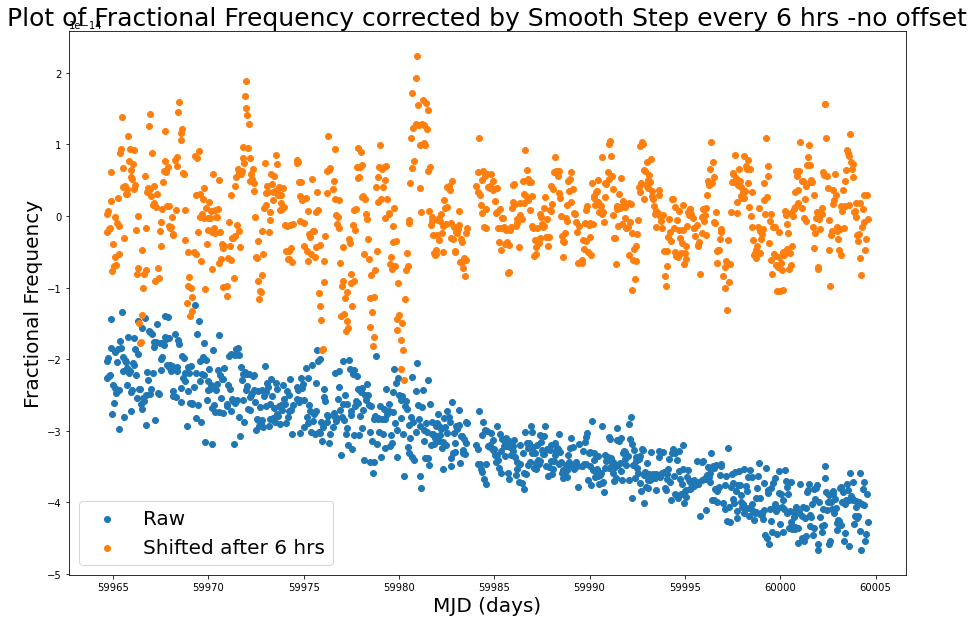

In [41]:
## Smooth steer every 6 hours

smooth_steer6_shifted = smooth_steer_CSF(np.arange(0,894,6),6,.25,np.array(Zoom_in_CSF['f0']) + fitted_line[0])
plot_steer(6,smooth_steer6_shifted)

(<matplotlib.collections.PathCollection at 0x7fbc73f52b80>,
 <matplotlib.collections.PathCollection at 0x7fbc73f8f9d0>)

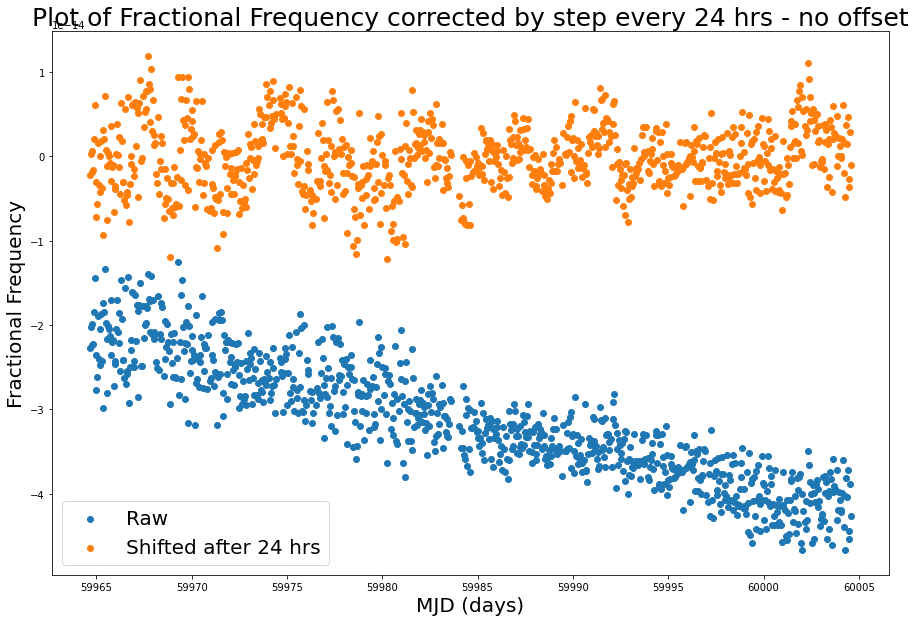

In [24]:
## Smooth steer every 24 hours

smooth_steer24_shifted = smooth_steer_CSF(np.arange(0,870,24),24,1,np.array(Zoom_in_CSF['f0']) + fitted_line[0])
plot_steer(24,smooth_steer24_shifted)

(<matplotlib.collections.PathCollection at 0x7fbc73ed95b0>,
 <matplotlib.collections.PathCollection at 0x7fbc73f218b0>)

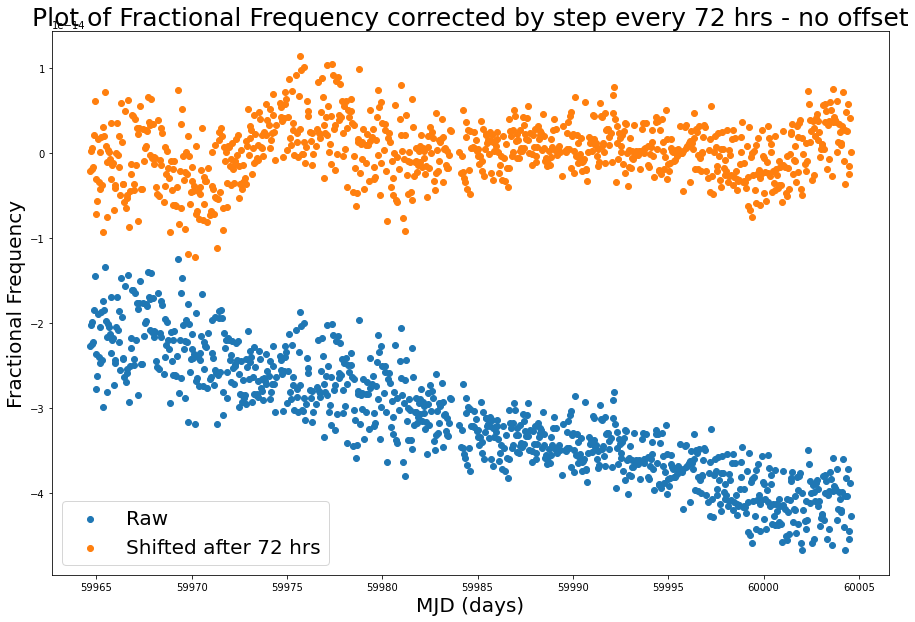

In [25]:
## Smooth steer every 72 hours

smooth_steer72_shifted = smooth_steer_CSF(np.arange(0,850,72),72,3,np.array(Zoom_in_CSF['f0']) + fitted_line[0])
plot_steer(72,smooth_steer72_shifted)

(<matplotlib.collections.PathCollection at 0x7fbc73f2a400>,
 <matplotlib.collections.PathCollection at 0x7fbc73e9c3a0>)

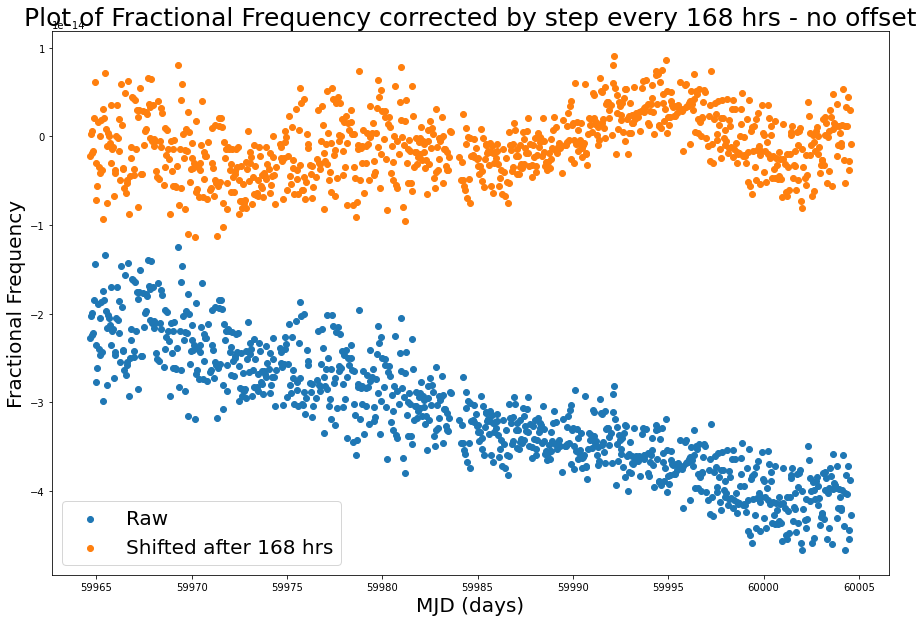

In [26]:
## Smooth steer every week

smooth_steerweek_shifted = smooth_steer_CSF(np.arange(0,750,168),168,7, np.array(Zoom_in_CSF['f0'])+ fitted_line[0])
plot_steer(168,smooth_steerweek_shifted)

## 1.5 Calculate and Plot Allan Deviations for shifted data

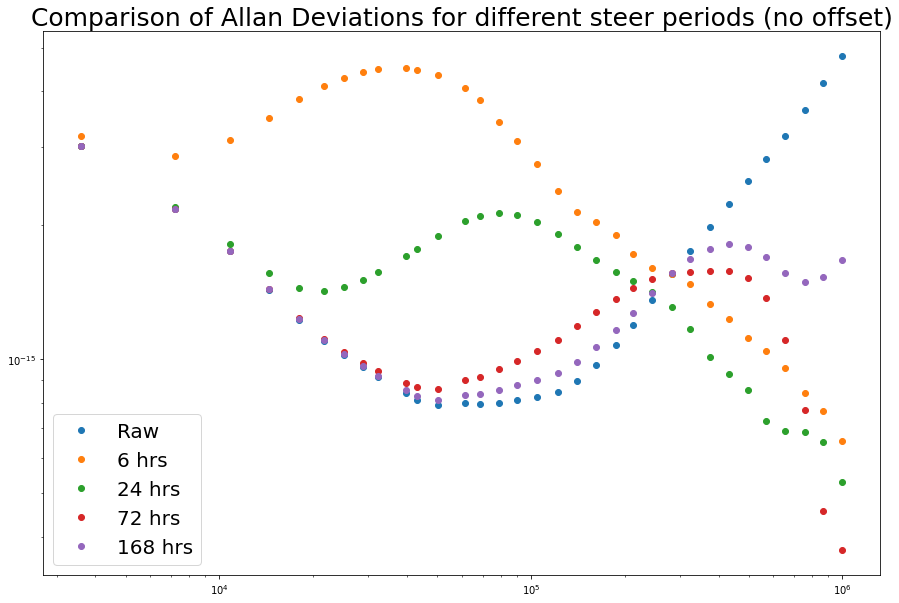

In [30]:
plt.figure(figsize=(15,10))

(t2, ad, ade, adn) = at.oadev(np.array(Zoom_in_CSF['f0']), rate=1/3600, data_type="freq",taus=np.logspace(0,6,100))
plt.loglog(t2, ad,'o',label='Raw')

AD6_smooth_offset = Allan_Dev(smooth_steer6_shifted,1/3600,np.logspace(0,6,100),6)
AD24_smooth_offset  = Allan_Dev(smooth_steer24_shifted,1/3600,np.logspace(0,6,100),24)
AD72_smooth_offset  = Allan_Dev(smooth_steer72_shifted,1/3600,np.logspace(0,6,100),72)
AD168_smooth_offset  = Allan_Dev(smooth_steerweek_shifted,1/3600,np.logspace(0,6,100),168)

plt.title('Comparison of Allan Deviations for different steer periods (no offset)',fontsize=25)
plt.legend(fontsize=20)

## 1.6 Compare Allan Deviations

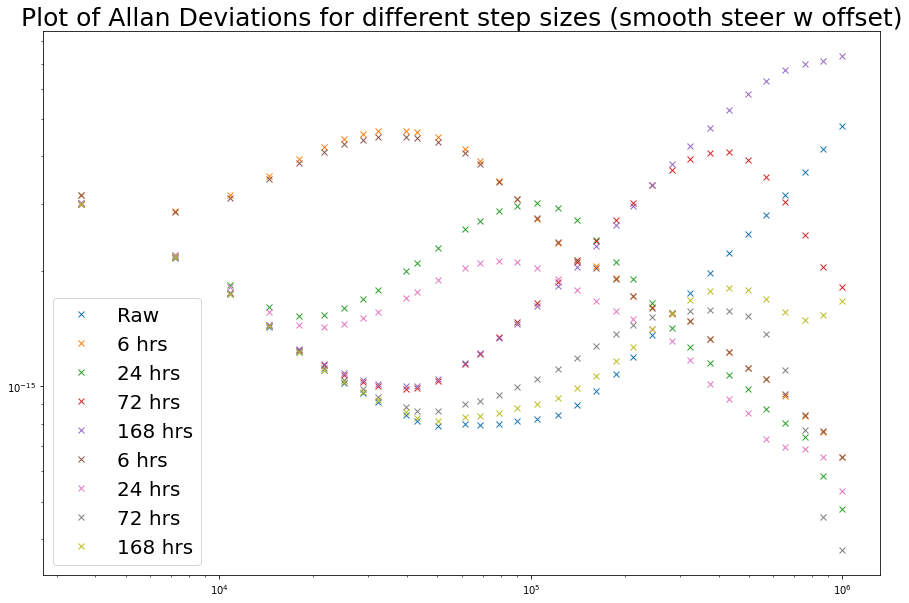

In [21]:
plt.figure(figsize=(15,10))

(t2, ad, ade, adn) = at.oadev(np.array(Zoom_in_CSF['f0']), rate=1/3600, data_type="freq",taus=np.logspace(0,6,100))
plt.loglog(t2, ad,'x',label='Raw')

AD6_smooth = Allan_Dev(smooth_steer6,1/3600,np.logspace(0,6,100),6)
AD24_smooth  = Allan_Dev(smooth_steer24,1/3600,np.logspace(0,6,100),24)
AD72_smooth  = Allan_Dev(smooth_steer72,1/3600,np.logspace(0,6,100),72)
AD168_smooth  = Allan_Dev(smooth_steerweek,1/3600,np.logspace(0,6,100),168)

AD6_smooth_offset = Allan_Dev(smooth_steer6_shifted,1/3600,np.logspace(0,6,100),6)
AD24_smooth_offset  = Allan_Dev(smooth_steer24_shifted,1/3600,np.logspace(0,6,100),24)
AD72_smooth_offset  = Allan_Dev(smooth_steer72_shifted,1/3600,np.logspace(0,6,100),72)
AD168_smooth_offset  = Allan_Dev(smooth_steerweek_shifted,1/3600,np.logspace(0,6,100),168)

plt.title('Plot of Allan Deviations for different step sizes (smooth steer w offset)',fontsize=25)
plt.legend(fontsize=20)